<a href="https://colab.research.google.com/github/shravankoninti/mlcourse.ai-1/blob/master/Medium_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#train.csv

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1DTuYupJwzsqO3ST99gC9qUt-lFIRVmQe' #https://drive.google.com/open?id=1DTuYupJwzsqO3ST99gC9qUt-lFIRVmQe
downloaded = drive.CreateFile({'id': file_id})


In [0]:
downloaded.GetContentFile('train.csv')

In [0]:

file_id = '1Dy0AC_Yc0kTihNWxwXMYsU8ORPmm1N_q' #https://drive.google.com/open?id=1Dy0AC_Yc0kTihNWxwXMYsU8ORPmm1N_q
downloaded = drive.CreateFile({'id': file_id}) 
  
  

In [0]:
downloaded.GetContentFile('test.csv')

In [0]:

file_id = '1b-7WC4DccQ_PRXoU8GqZcLyHQJxgn-Xm' #https://drive.google.com/open?id=1b-7WC4DccQ_PRXoU8GqZcLyHQJxgn-Xm
downloaded = drive.CreateFile({'id': file_id}) 
  
  

In [0]:
downloaded.GetContentFile('train_log1p_recommends.csv')

In [8]:
!ls

adc.json  sample_data  test.csv  train.csv  train_log1p_recommends.csv


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

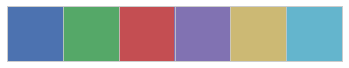

In [9]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import json
from tqdm import tqdm_notebook
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error


import numpy as np
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from scipy.sparse import csr_matrix, hstack
from scipy.stats import probplot
import pickle
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns 
import gc
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.preprocessing import StandardScaler
from scipy.sparse import (csr_matrix, hstack)


import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import (PorterStemmer, WordNetLemmatizer)
from sklearn.feature_extraction.text import (CountVectorizer,
                                             TfidfVectorizer)
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import (RidgeCV, Ridge)
from sklearn.model_selection import (GridSearchCV, 
                                     cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import StandardScaler
from scipy.sparse import (csr_matrix, hstack)

import nltk
nltk.download("popular")
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS


color = sns.color_palette()
sns.set_style("whitegrid")
sns.set_context("paper")
sns.palplot(color)

In [10]:
# read data from file
# train = pd.read_csv("../input/train.csv") 
# test = pd.read_csv("../input/test.csv")

train = pd.read_csv("train.csv", index_col = 0, encoding = 'utf-8') 
test = pd.read_csv("test.csv", index_col = 0 ,encoding = 'utf-8')

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 62313
Number of features in train: 14
Number of data points in test: 34645
Number of features in test: 13


In [11]:
train.head(2)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,target
0,Susan BrattonTrusted Hot Sex Advisor To Millio...,1970-01-01 00:00:00.001,Saving Your Marriage By Watching Steamy Sex Ed...,Susan Bratton,medium.com,Lovemaking Sex SexPositions EarlyBird SexEdVideos,5473,http://personallifemedia.com/2017/01/saving-ma...,3,1970,1,0,5,1.09861
1,"Ryo OoishiDec 31, 1969やってよかった中学受験明日から息子の中学受験がは...",1970-01-01 00:00:00.001,やってよかった中学受験,Ryo Ooishi,medium.com,NaN,5325,https://medium.com/@ooishi/%E3%82%84%E3%81%A3%...,3,1970,1,0,0,2.56495


In [12]:
test.head(2)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags
0,Member previewHITRECORDhitrecord.org is a new ...,2018-02-21 17:01:00.928,"For Night Owls, the Day Starts with a Nocturna...",HITRECORD,medium.com,MorningRoutines Hitrecord Podcast Night,12500,https://medium.com/on-mornings/nocturnalmornin...,2,2018,2,17,4
1,Member previewMaria Bustillosis a journalist a...,2017-12-07 15:56:00.967,Blockchain is Memory,Maria Bustillos,medium.com,Blockchain Technology History Network WordsTha...,6703,https://medium.com/wordsthatmatter/never-break...,3,2017,12,15,5


In [13]:
train.dtypes

content            object
published          object
title              object
author             object
domain             object
tags               object
length              int64
url                object
dow                 int64
year                int64
month               int64
hour                int64
number_of_tags      int64
target            float64
dtype: object

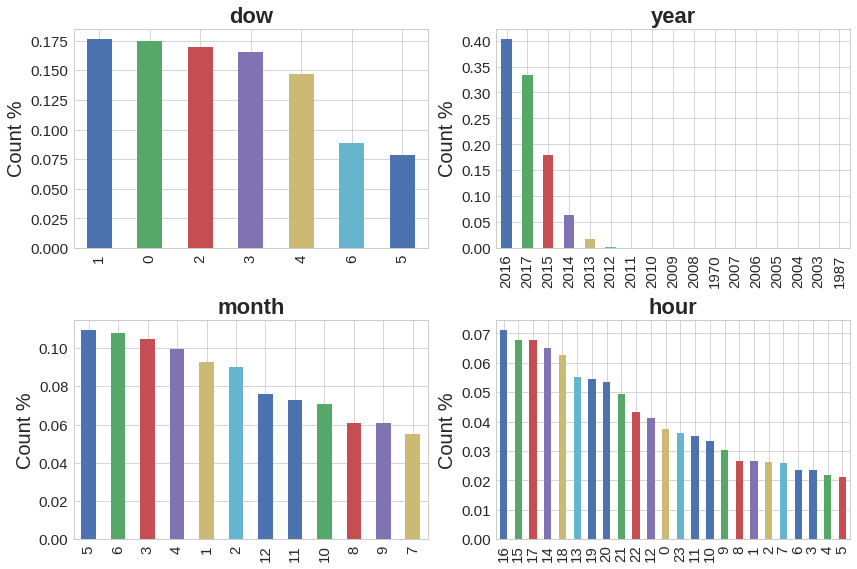

In [14]:
plt.figure(1)
plt.subplot(221)
train['dow'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
plt.title('dow', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)


plt.subplot(222)
train['year'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
plt.title('year', fontweight="bold",fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(223)
train['month'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
plt.title('month', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(224)
train['hour'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
plt.title('hour', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)
plt.tight_layout()

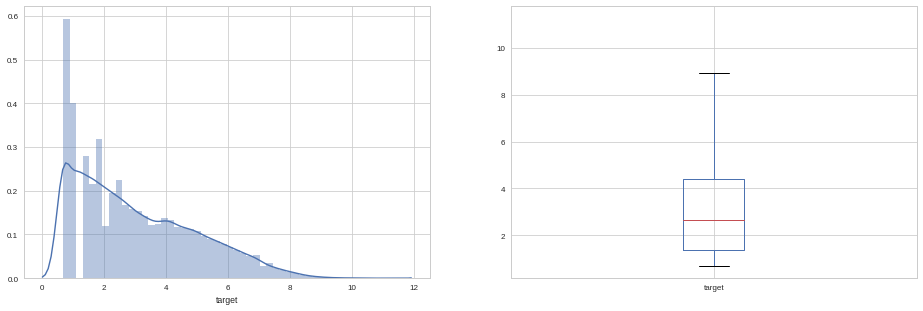

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['target'])


plt.subplot(122)
train['target'].plot.box(figsize=(16,5))

plt.show()

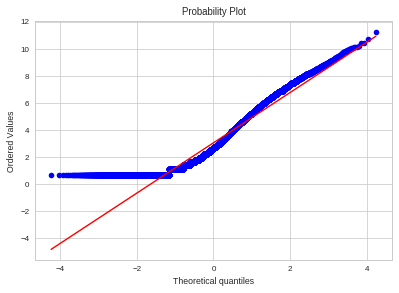

In [16]:
probplot(train.target.values, dist="norm", plot=plt);

In [17]:
train.sort_values(by='target', ascending=False).reset_index(drop=True).loc[0, 'url']

'https://medium.com/personal-growth/13-things-you-need-to-give-up-if-you-want-to-be-successful-44b5b9b06a26'

## Other Features

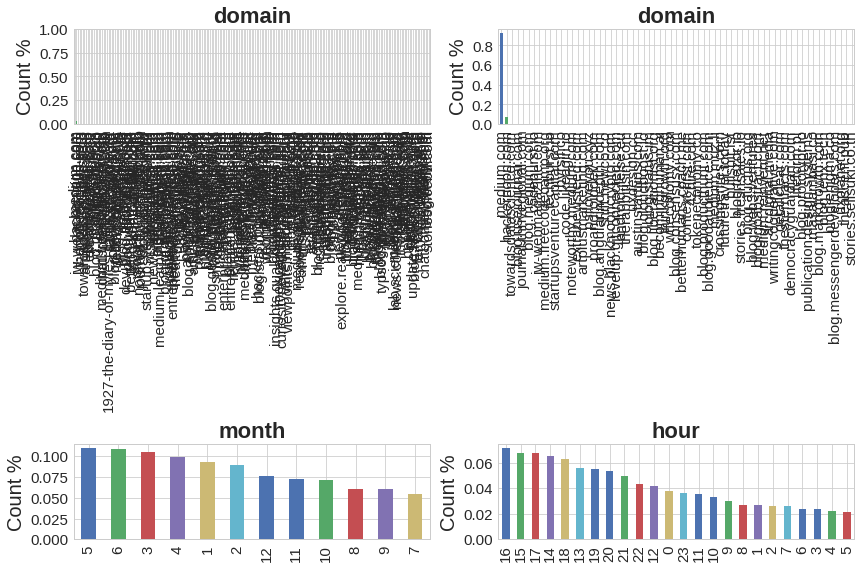

In [18]:
plt.figure(1)
plt.subplot(221)
train['domain'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
plt.title('domain', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)
plt.xticks(rotation=90)


plt.subplot(222)
test['domain'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
plt.title('domain', fontweight="bold",fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)
plt.xticks(rotation=90)

plt.subplot(223)
train['month'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
plt.title('month', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(224)
train['hour'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
plt.title('hour', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)
plt.tight_layout()

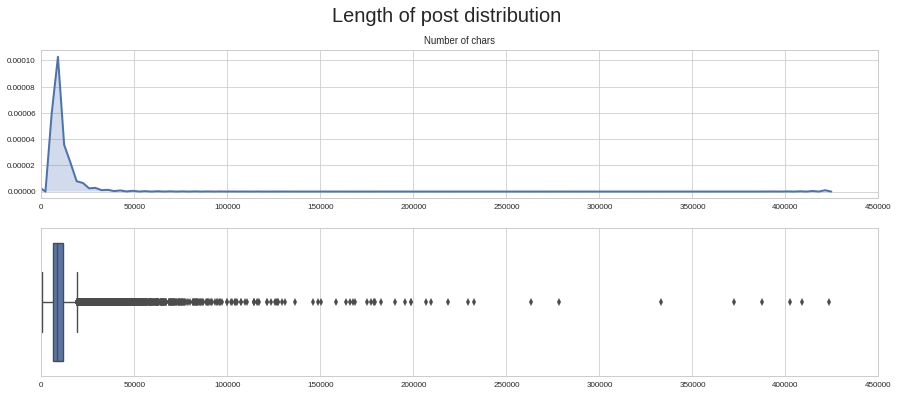

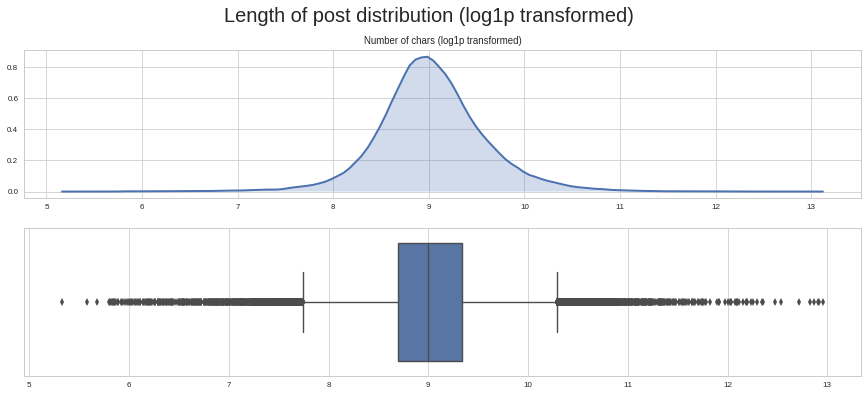

In [19]:
plt.figure(figsize=(15,6))
plt.suptitle("Length of post distribution",fontsize=20)
gridspec.GridSpec(2,1)

plt.subplot2grid((2,1),(0,0))
plt.xlim(0, 450000)
sns.distplot(train.length.values, hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})
plt.title("Number of chars")

plt.subplot2grid((2,1),(1,0))
plt.xlim(0, 450000)
sns.boxplot(train.length.values);

plt.figure(figsize=(15,6))
plt.suptitle("Length of post distribution (log1p transformed)",fontsize=20)
gridspec.GridSpec(2,1)


plt.subplot2grid((2,1),(0,0))
sns.distplot(np.log1p(train.length.values), hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})
plt.title("Number of chars (log1p transformed)")

plt.subplot2grid((2,1),(1,0))
sns.boxplot(np.log1p(train.length.values));

In [0]:
content_train = train['content'].values.tolist()
title_train = train['title'].values.tolist()
tags_train = train['tags'].values.tolist()
y_train = train['target'].values
train.drop(['content', 'title', 'target', 'tags', 'published', 'length', 'url'], axis=1, inplace=True)

content_test = test['content'].values.tolist()
title_test = test['title'].values.tolist()
tags_test = test['tags'].values.tolist()
test.drop(['content', 'title', 'tags', 'published', 'length', 'url'], axis=1, inplace=True)

In [21]:
train.head(2)

,author,domain,dow,year,month,hour,number_of_tags
0,Susan Bratton,medium.com,3,1970,1,0,5
1,Ryo Ooishi,medium.com,3,1970,1,0,0


In [22]:
train.columns

Index(['author', 'domain', 'dow', 'year', 'month', 'hour', 'number_of_tags'], dtype='object')

In [23]:
test.head(2)

,author,domain,dow,year,month,hour,number_of_tags
0,HITRECORD,medium.com,2,2018,2,17,4
1,Maria Bustillos,medium.com,3,2017,12,15,5


In [24]:
test.columns

Index(['author', 'domain', 'dow', 'year', 'month', 'hour', 'number_of_tags'], dtype='object')

In [0]:
%%time

idx_split = len(train)
df_full = pd.concat([train, test])

list_to_dums = ['author', 'dow', 'month', 'hour', 'domain', 'year']
dummies = pd.get_dummies(df_full, columns = list_to_dums, drop_first=True,
                            prefix=list_to_dums, sparse=False)

X_train_feats = dummies.iloc[:idx_split, :]
X_test_feats = dummies.iloc[idx_split:, :]

print('TRAIN feats: {}'.format(X_train_feats.shape))
print('TEST feats: {}'.format(X_test_feats.shape))
del dummies, df_full
gc.collect()

In [0]:
%%time
# cv_title = CountVectorizer(max_features=30000)
cv_content = CountVectorizer(max_features=50000)
cv_tags = CountVectorizer(max_features=1000)


# X_train_title = cv_title.fit_transform(title_train)
# X_test_title = cv_title.transform(title_test)
X_train_content = cv_content.fit_transform(pd.DataFrame(content_train).values.astype('U'))
X_test_content = cv_content.transform(pd.DataFrame(content_test).values.astype('U'))
X_train_tags = cv_tags.fit_transform(pd.DataFrame(tags_train).values.astype('U'))
X_test_tags = cv_tags.transform(pd.DataFrame(tags_test).values.astype('U'))

print('TRAIN content: {}, tags: {}'.format(X_train_content.shape, X_train_tags.shape))
print('TEST content: {}, tags: {}'.format(X_test_content.shape, X_test_tags.shape))
del content_train, content_test, tags_train, tags_test
gc.collect()

In [0]:
def add_time_features(df, X_sparse):
    hour = df['date'].apply(lambda ts: ts.hour)
    morning = ((hour >= 7) & (hour <= 11)).astype('int')
    day = ((hour >= 12) & (hour <= 18)).astype('int')
    evening = ((hour >= 19) & (hour <= 23)).astype('int')
    night = ((hour >= 0) & (hour <= 6)).astype('int')
    
    weekday = df['date'].apply(lambda ts: ts.weekday())
    is_monday = (weekday == 0).astype('int')
    is_tuesday = (weekday == 1).astype('int')
    is_wednesday = (weekday == 2).astype('int')
    is_thursday = (weekday == 3).astype('int')
    is_friday = (weekday == 4).astype('int')
    is_weekend = (weekday >= 5).astype('int')
    
    X = hstack([X_sparse,
                morning.values.reshape(-1, 1), 
                day.values.reshape(-1, 1),
                evening.values.reshape(-1, 1), 
                night.values.reshape(-1, 1),
                is_monday.values.reshape(-1, 1),
                is_tuesday.values.reshape(-1, 1),
                is_wednesday.values.reshape(-1, 1),
                is_thursday.values.reshape(-1, 1),
                is_friday.values.reshape(-1, 1),
                is_weekend.values.reshape(-1, 1)]).tocsr()
    return X

In [0]:
def get_content_features(contents):
    content_lengths = list()
    h1_counts = list()
    h2_counts = list()
    h3_counts = list()
    img_counts = list()
    href_counts = list()
    
    for content in contents:
        content_stripped = strip_tags(content)   
        content_length = len(content_stripped.split())
        content_lengths.append(content_length)
        h1_counts.append(content.count('<h1'))
        h2_counts.append(content.count('<h2'))
        h3_counts.append(content.count('<h3'))
        img_counts.append(content.count('<img'))
        href_counts.append(content.count('<href'))
        
    counts = np.hstack([np.array(h1_counts).reshape(-1, 1),
                    np.array(h2_counts).reshape(-1, 1),
                    np.array(h3_counts).reshape(-1, 1),
                    np.array(img_counts).reshape(-1, 1),
                    np.array(href_counts).reshape(-1, 1)])
    
    content_lengths = np.array(content_lengths)
    is_short = (content_lengths<1350).astype('int')
    is_medium = ((content_lengths>=1350) & (content_lengths<2700)).astype('int')
    is_long = ((content_lengths>=2700) & (content_lengths<6750)).astype('int')
    is_huge = (content_lengths>=6750).astype('int')
    
    length_types = np.hstack([is_short.reshape(-1, 1),
                              is_medium.reshape(-1, 1),
                              is_long.reshape(-1, 1),
                              is_huge.reshape(-1, 1) ])
    
    return counts, length_types

In [0]:
def get_title_features(titles):
    titles_lengths = np.array([len(title.split()) for title in titles])
    is_short = (titles_lengths<6).astype('int')
    is_medium = ((titles_lengths>=6) & (titles_lengths<11)).astype('int')
    is_long = ((titles_lengths>=11) & (titles_lengths<20)).astype('int')
    is_huge = (titles_lengths>=20).astype('int')
    
    length_types = np.hstack([is_short.reshape(-1, 1),
                              is_medium.reshape(-1, 1),
                              is_long.reshape(-1, 1),
                              is_huge.reshape(-1, 1) ])
    return length_types

In [0]:
class StemmingLemmatizingTokenizer(object):
    
    def __init__(self, stemmer=PorterStemmer, lemmatizer=WordNetLemmatizer):
        self.stemmer = stemmer()
        self.lemmatizer = lemmatizer()
        
    def __call__(self, doc):
        # strings of punctuation signs and digits
        from string import punctuation, digits
        # some other unicode chars i found in the content
        other_unicode_chars = '’’”“\u200b'
        chars_to_remove = ''.join((punctuation,
                                   digits,
                                   other_unicode_chars))
        # getting rid of punctuation signs and digits
        transtab = str.maketrans(chars_to_remove, ' '*len(chars_to_remove))
        # goiinf through all tokens with 3 or more chars
        # lemmatizing the verbs first, then stemming all words
        return [self.stemmer.stem(self.lemmatizer.lemmatize(token, pos='v')) 
                for token in word_tokenize(doc.translate(transtab)) 
                if len(token) >= 3]

In [0]:
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS
temp = []
s = StemmingLemmatizingTokenizer()
for eggs in stop_words:
    token = s(eggs)
    if token:
        temp += token
stop_words = temp

#### Initializing the vectorizers and scalers since we want our features from test set be scaled and vectorized according to train set.

In [0]:
author_vectorizer = CountVectorizer()
counts_scaler = StandardScaler()
content_vectorizer = TfidfVectorizer(ngram_range=(1, 2),
                                     tokenizer=StemmingLemmatizingTokenizer(),
                                     stop_words=stop_words,
                                     
                                     max_features=200000)
title_vectorizer = TfidfVectorizer(ngram_range=(2, 3), 
                                   tokenizer=StemmingLemmatizingTokenizer(),
                                   stop_words=stop_words,
                                   
                                   max_features=200000)

In [0]:
train.columns

Index(['content', 'published', 'title', 'author', 'domain', 'tags', 'length',
       'url', 'dow', 'year', 'month', 'hour', 'number_of_tags', 'target'],
      dtype='object')

### And let's create the train data set!

In [0]:
%%time
author_sparse = author_vectorizer.fit_transform(train['author'])


CPU times: user 368 ms, sys: 2.03 ms, total: 370 ms
Wall time: 373 ms


In [0]:
author_sparse

<62313x29782 sparse matrix of type '<class 'numpy.int64'>'
	with 126198 stored elements in Compressed Sparse Row format>

In [0]:
%%time
def extract_published_date(train):    
    dates_df = pd.DataFrame(train['published'])
    dates_df['date'] = pd.to_datetime(train['published'])
    return dates_df

train_data = add_time_features(extract_published_date(train), author_sparse)

CPU times: user 559 ms, sys: 5.97 ms, total: 565 ms
Wall time: 565 ms


In [0]:
train_data

<62313x29792 sparse matrix of type '<class 'numpy.int64'>'
	with 250824 stored elements in Compressed Sparse Row format>

In [0]:
%%time
# raw_contents = get_contents(TRAIN_PATH)

In [0]:
%%time
# counts, length_types = get_content_features(train['content'])

counts_scaled = counts_scaler.fit_transform(train['length'].reshape(-1, 1))

CPU times: user 2.41 ms, sys: 1.94 ms, total: 4.35 ms
Wall time: 3.5 ms


In [0]:
%%time

title_length_types = get_title_features(train['title'])

CPU times: user 54.1 ms, sys: 0 ns, total: 54.1 ms
Wall time: 57.8 ms


In [0]:
%%time
title_sparse = title_vectorizer.fit_transform(train['title'])

In [0]:
train_data = hstack([train_data,
                     title_sparse,
                     title_length_types,
                     content_sparse,
                     counts_scaled,
                     length_types]).tocsr()